A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'FamilyMembers'}>],
       [<AxesSubplot:title={'center':'ChronicDiseases'}>,
        <AxesSubplot:title={'center':'TravelInsurance'}>]], dtype=object)

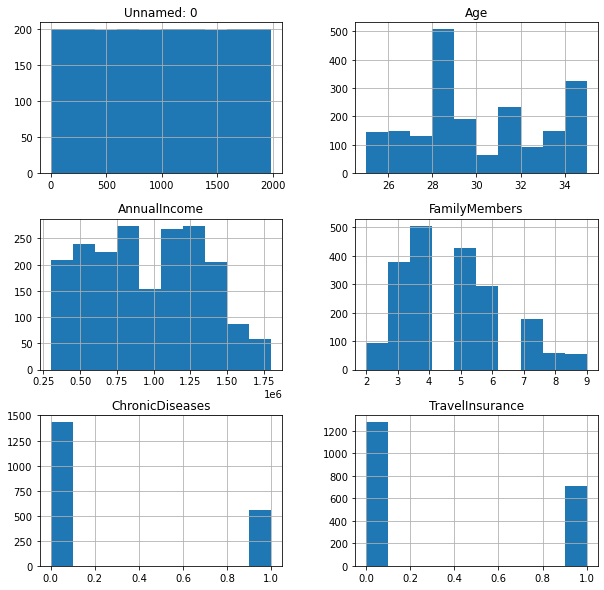

In [4]:
#ToDo: Show histogram of dataframe
df.hist(figsize = (10, 10))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Dữ liệu không có mising values

## Data Analysis

In [6]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]


In [7]:
# Check Missing values
df[categorical_cols].isnull().sum()

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

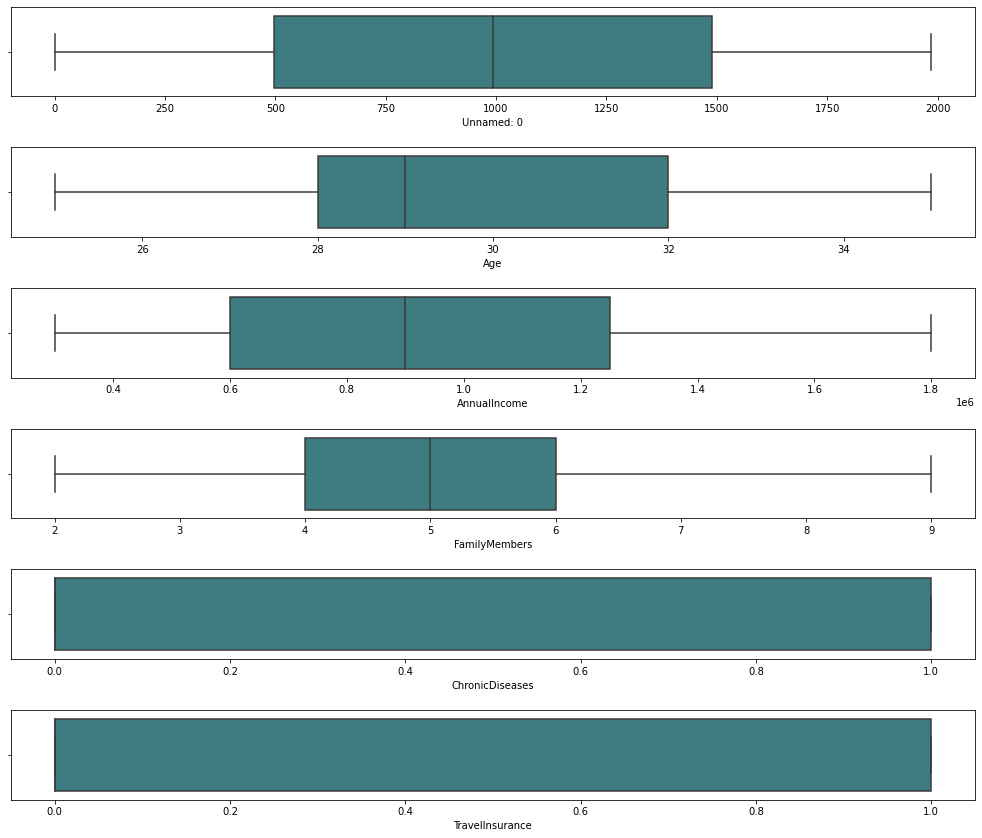

In [8]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

<AxesSubplot:xlabel='TravelInsurance', ylabel='Count'>

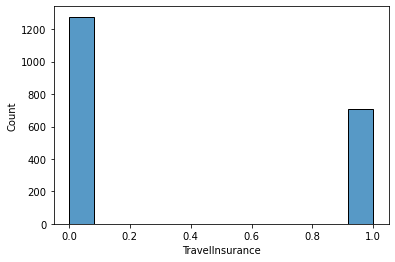

In [9]:
#Xem phân phối của TravelInsurance
sns.histplot(x="TravelInsurance", data=df)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_6780/1481880412.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

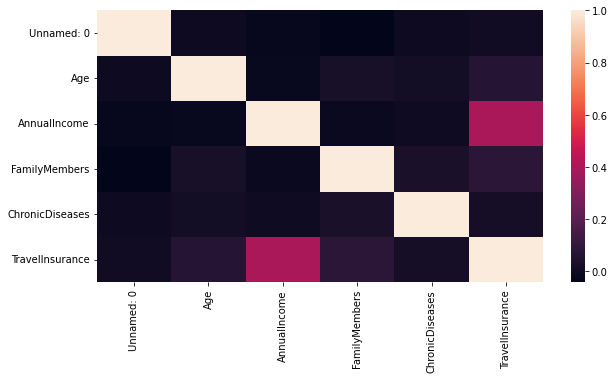

In [10]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr())

## Preprocessing

In [11]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop(df.columns[0], axis = 1, inplace = True)
    return df

In [12]:
df = preprocessing_data(df.copy())
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

In [13]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df["Employment Type"] = df["Employment Type"].astype("category").cat.codes
    df["GraduateOrNot"] = df["GraduateOrNot"].astype("category").cat.codes
    df["FrequentFlyer"] = df["FrequentFlyer"].astype("category").cat.codes
    df["EverTravelledAbroad"] = df["EverTravelledAbroad"].astype("category").cat.codes
    return df



<AxesSubplot:>

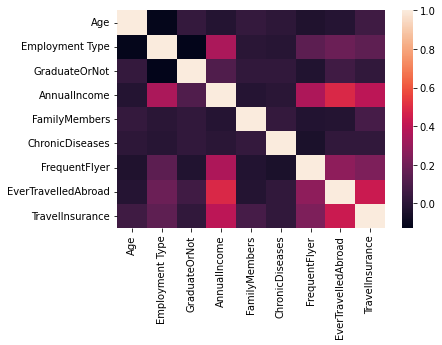

In [14]:
df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [15]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_name = df.columns.tolist()
    feature_name.remove("TravelInsurance")
    X = df[feature_name].values # Todo: Select features
    y = df.TravelInsurance.values# Todo: Select label
    return X, y

X, y = prepare_X_y(df)


# Apply machine learning model

## Train-test split

In [16]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [18]:
model = RandomForestClassifier()
model.fit(trainX, trainY)
y_pred = model.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       253
           1       0.82      0.63      0.72       145

    accuracy                           0.82       398
   macro avg       0.82      0.78      0.79       398
weighted avg       0.82      0.82      0.81       398



In [19]:
X, y = make_classification(n_samples=1987, n_features=10, n_informative=5, n_redundant=0, 
                           n_clusters_per_class=2, weights=[0.7, 0.3], class_sep=0.8, random_state=33)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

ros = RandomOverSampler(random_state=33)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [21]:
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_resampled)
rf = RandomForestClassifier(n_estimators=100, random_state=33, class_weight={0: class_weights[0], 1: class_weights[1]})
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight={0: 1.0, 1: 1.0}, random_state=33)

In [22]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       270
           1       0.90      0.80      0.85       128

    accuracy                           0.91       398
   macro avg       0.91      0.88      0.89       398
weighted avg       0.91      0.91      0.91       398



## Build SK-learn model

In [23]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Without Scaler
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    #model = make_pipeline()
    naive_model = GaussianNB()
    naive_model.fit(X, y.ravel())
    # Todo: fit your model with X, y

    return naive_model

def calculate_performance(y_test, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("Precision", precision_score(y_test, y_pred))
    print("Recall", recall_score(y_test, y_pred))
    print("Accuracy", accuracy_score(y_test, y_pred))
    print("F1", f1_score(y_test, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_test, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
print("Main score: ",calculate_performance(testY, pred))

Precision 0.7596153846153846
Recall 0.5448275862068965
Accuracy 0.7713567839195979
F1 0.6345381526104418
Main score:  0.6345381526104418


In [24]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



In [25]:
from sklearn.preprocessing import MinMaxScaler
# Scaler
normalizer = MinMaxScaler()
X_normal_train = normalizer.fit_transform(trainX)
X_normal_test = normalizer.transform(testX)

# Model training
naive_model = GaussianNB()
naive_model.fit(X_normal_train, trainY.ravel())

predicted_label = naive_model.predict(X_normal_test)
print(classification_report(testY, predicted_label))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

# set the tolerance to a large value to make the example faster
gau_nb = GaussianNB()
pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-4, -9, num=100)
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


predicted_label = search.predict(testX)
print(classification_report(testY, predicted_label))

Best parameter (CV score=0.741):
{'gau_nb__var_smoothing': 0.0001, 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.76      0.54      0.63       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



In [27]:
# Mixed Naive Bayes
from mixed_naive_bayes import MixedNB

clf = MixedNB(categorical_features=[1, 2, 5, 6, 7]) #categorical columns are at 0 & 1
clf.fit(trainX, trainY)
clf_pred=clf.predict(testX)
print(classification_report(testY, clf_pred))


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       253
           1       0.78      0.52      0.62       145

    accuracy                           0.77       398
   macro avg       0.77      0.72      0.73       398
weighted avg       0.77      0.77      0.76       398



Metric chính cho bài toán: vì tập dữ liệu mất cân bằng (số lượng sample giữa các lớp chênh lệch nhiều) nên accuracy không phù hợp cho bài toán này vì không phản ánh đúng hiệu suất của mô hình. Vì mục đích của bài toán này là tối đa khả năng phát hiện khách hàng tiềm năng nên Recall phù hợp để đánh giá mô hình. Nhờ vậy, mô hình có thể phát hiện được nhiều khách hàng tiềm năng, công ty bảo hiểm có thể tiếp cận và tìm cách thuyết phục khách hàng mua bảo hiểm.
Áp dụng MinMaxScaler để cân bằng độ lớn của các thuộc tính và giảm thiểu ảnh hưởng của các điểm ngoại lai. 
MixedNB phù hợp vì dữ liệu vừa chứa cả biến liên tục và rời rạc. 